In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
import pickle as pkl

In [2]:
df = pd.read_csv('customer_booking.csv', encoding='latin-1')
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [3]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df.sales_channel.value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [6]:
df.trip_type.value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [7]:
df.flight_day.value_counts()

Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

In [8]:
df.route.value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [9]:
df.booking_origin.value_counts()

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

In [10]:
days = {
    'Mon':1,
    'Tue':2,
    'Wed':3,
    'Thu':4,
    'Fri':5,
    'Sat':6,
    'Sun':7
}
df['flight_day'] = df['flight_day'].map(days)

In [11]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [12]:
correlation = df.corr()
correlation

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.212606,-0.115850,0.015607,0.015407,0.120404,0.028544,0.022943,-0.063169,0.024116
purchase_lead,0.212606,1.000000,-0.076560,0.035973,0.036531,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.076560,1.000000,-0.024872,-0.000310,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.035973,-0.024872,1.000000,0.024086,-0.011434,0.012171,0.013014,-0.002101,0.007127
flight_day,0.015407,0.036531,-0.000310,0.024086,1.000000,-0.002503,0.005392,0.009281,0.018434,-0.006986
wants_extra_baggage,0.120404,-0.022207,0.176757,-0.011434,-0.002503,1.000000,0.207669,0.216470,0.057054,0.068139
wants_preferred_seat,0.028544,-0.004499,0.032264,0.012171,0.005392,0.207669,1.000000,0.315088,0.101289,0.050116
wants_in_flight_meals,0.022943,-0.022653,0.098828,0.013014,0.009281,0.216470,0.315088,1.000000,0.154312,0.026511
flight_duration,-0.063169,0.067866,0.141181,-0.002101,0.018434,0.057054,0.101289,0.154312,1.000000,-0.106266
booking_complete,0.024116,-0.022131,-0.042408,0.007127,-0.006986,0.068139,0.050116,0.026511,-0.106266,1.000000


<AxesSubplot:>

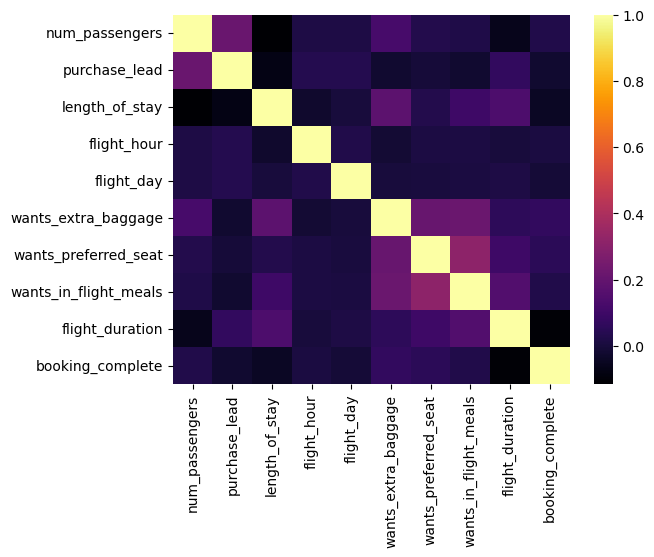

In [13]:
sns.heatmap(correlation, cmap='inferno')

<AxesSubplot:xlabel='num_passengers'>

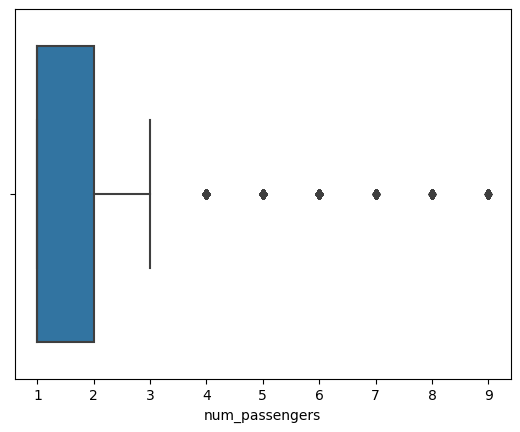

In [14]:
sns.boxplot(x=df['num_passengers'])

<AxesSubplot:xlabel='flight_day'>

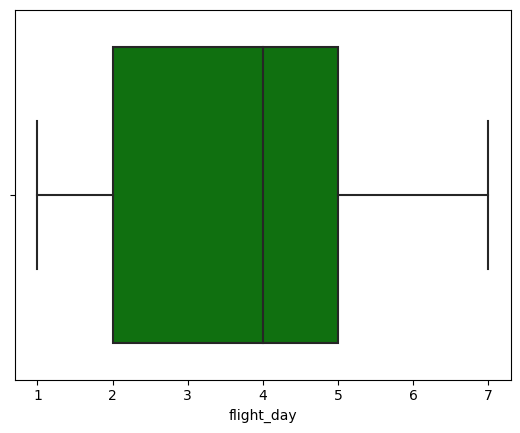

In [15]:
sns.boxplot(x=df['flight_day'], color='green')

In [16]:
keys = df.num_passengers.value_counts()
keys

1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: num_passengers, dtype: int64

In [17]:
num_pass_keys = []
num_pass_values = []
for i, j in keys.items():
    num_pass_keys.append(i)
    num_pass_values.append(j)
print(num_pass_keys, num_pass_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9] [31352, 12804, 2941, 1784, 561, 289, 114, 89, 66]


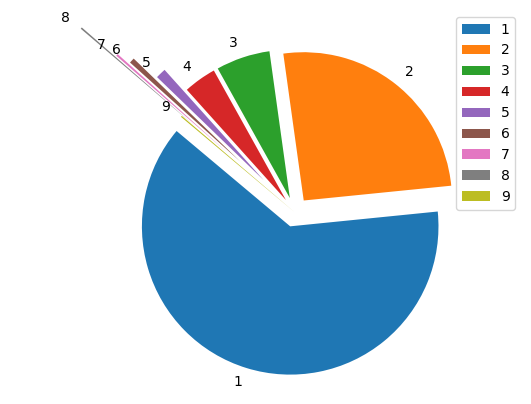

In [18]:
plt.pie(num_pass_values, labels=num_pass_keys, explode=[0.1, 0.1, 0.1, 0.1, 0.3, 0.5, 0.6, 0.9, 0], startangle=140)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.axis('equal')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


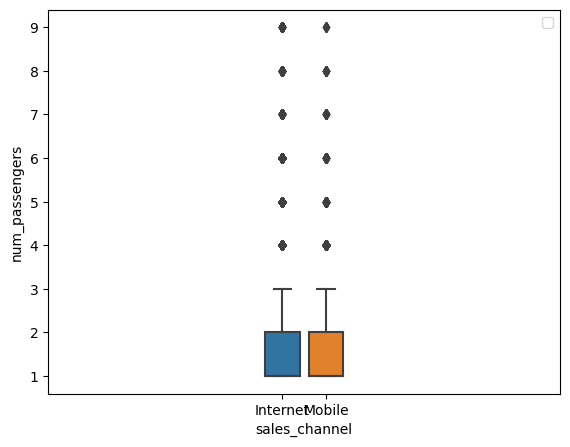

In [19]:
sns.boxplot(x=df['sales_channel'], y=df['num_passengers'])
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.axis('equal')
plt.legend()
plt.show()

In [20]:
keys = df.sales_channel.value_counts()
keys

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [21]:
num_pass_keys = []
num_pass_values = []
for i, j in keys.items():
    num_pass_keys.append(i)
    num_pass_values.append(j)
print(num_pass_keys, num_pass_values)

['Internet', 'Mobile'] [44382, 5618]


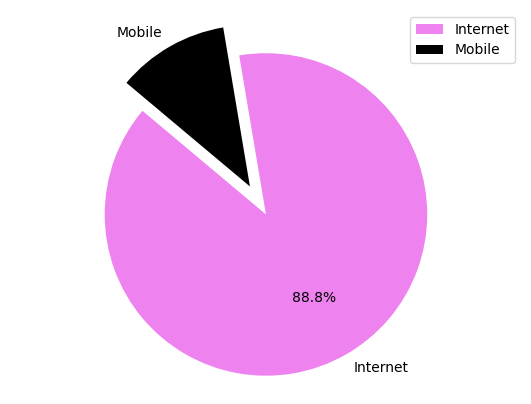

In [22]:
plt.pie(num_pass_values, labels=num_pass_keys, explode=[0.1, 0.1], colors=['violet','black'], startangle=140, autopct='%1.1f%%')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.axis('equal')
plt.legend()
plt.show()

In [23]:
keys = df.trip_type.value_counts()
keys

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [24]:
num_pass_keys = []
num_pass_values = []
for i, j in keys.items():
    num_pass_keys.append(i)
    num_pass_values.append(j)
print(num_pass_keys, num_pass_values)

['RoundTrip', 'OneWay', 'CircleTrip'] [49497, 387, 116]


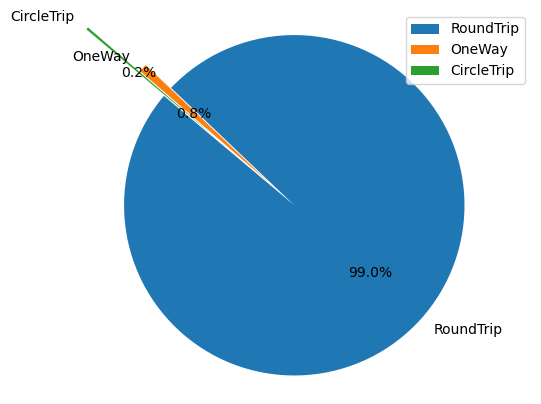

In [25]:
plt.pie(num_pass_values, labels=num_pass_keys, explode=[0.1, 0.1, 0.5], startangle=140, autopct='%1.1f%%')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.axis('equal')
plt.legend()
plt.show()

In [26]:
(df['booking_origin'].value_counts())

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

In [27]:
df.route.value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [28]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [29]:
sales_channel_le = LabelEncoder()
trip_type_le = LabelEncoder()

In [30]:
df['sales_channel'] = sales_channel_le.fit_transform(df['sales_channel'])
df['trip_type'] = trip_type_le.fit_transform(df['trip_type'])

In [31]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,0,2,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,0,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,0,2,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,0,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,0,2,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,0,2,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,0,2,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [32]:
sales_channel_le.classes_

array(['Internet', 'Mobile'], dtype=object)

In [33]:
trip_type_le.classes_

array(['CircleTrip', 'OneWay', 'RoundTrip'], dtype=object)

In [34]:
df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [35]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [36]:
df[['route', 'booking_origin']]

,route,booking_origin
0,AKLDEL,New Zealand
1,AKLDEL,New Zealand
2,AKLDEL,India
3,AKLDEL,New Zealand
4,AKLDEL,India
...,...,...
49995,PERPNH,Australia
49996,PERPNH,Australia
49997,PERPNH,Australia
49998,PERPNH,Australia


In [37]:
route_booking = encoder.fit_transform(df[['booking_origin']])
route_booking

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
encoder.categories_

[array(['(not set)', 'Afghanistan', 'Algeria', 'Argentina', 'Australia',
        'Austria', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Bhutan',
        'Brazil', 'Brunei', 'Bulgaria', 'Cambodia', 'Canada', 'Chile',
        'China', 'Colombia', 'Croatia', 'Cyprus', 'Czech Republic',
        'Czechia', 'Denmark', 'Egypt', 'Estonia', 'Finland', 'France',
        'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Guam', 'Guatemala',
        'Hong Kong', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq',
        'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan',
        'Kenya', 'Kuwait', 'Laos', 'Lebanon', 'Macau', 'Malaysia',
        'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Mongolia',
        'Myanmar (Burma)', 'Nepal', 'Netherlands', 'New Caledonia',
        'New Zealand', 'Nicaragua', 'Norfolk Island', 'Norway', 'Oman',
        'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru',
        'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia',
        'Réu

In [39]:
feature_names = []
for feature in encoder.categories_:
    feature_names.extend(feature)

In [40]:
route_booking_df = pd.DataFrame(route_booking, columns=feature_names)
route_booking_df

,(not set),Afghanistan,Algeria,Argentina,Australia,Austria,Bahrain,Bangladesh,Belarus,Belgium,...,Timor-Leste,Tonga,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Vanuatu,Vietnam
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
features = df.drop(['route', 'booking_origin', 'booking_complete'], axis =1)
features

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,0,2,262,19,7,6,1,0,0,5.52
1,1,0,2,112,20,3,6,0,0,0,5.52
2,2,0,2,243,22,17,3,1,1,0,5.52
3,1,0,2,96,31,4,6,0,0,1,5.52
4,2,0,2,68,22,15,3,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,6,1,0,1,5.62
49996,1,0,2,111,6,4,7,0,0,0,5.62
49997,1,0,2,24,6,22,6,0,0,1,5.62
49998,1,0,2,15,6,11,1,1,0,1,5.62


In [42]:
features = pd.concat([features, route_booking_df], axis = 1)
features

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,Timor-Leste,Tonga,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Vanuatu,Vietnam
0,2,0,2,262,19,7,6,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,2,112,20,3,6,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,2,243,22,17,3,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,2,96,31,4,6,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0,2,68,22,15,3,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,6,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,1,0,2,111,6,4,7,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,1,0,2,24,6,22,6,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,1,0,2,15,6,11,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
booking_target = df[['booking_complete']]
booking_target

,booking_complete
0,0
1,0
2,0
3,0
4,0
...,...
49995,0
49996,0
49997,0
49998,0


In [44]:
booking_target.value_counts()

booking_complete
0                   42522
1                    7478
dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(features, booking_target, test_size=0.2, random_state=42)

In [46]:
Y_train = np.ravel(y_train)

In [50]:
algorithms = {
    'Decision Tree' : {
        'model': DecisionTreeClassifier(criterion='entropy'),
        'param':{}
    },
    
    'Random Forest' : {
        'model': RandomForestClassifier(),
        'param':{}
    },
    
    'Adaabooster' : {
        'model': AdaBoostClassifier(),
        'param':{}
    },
    
    'MultinomialNB' : {
        'model': MultinomialNB(),
        'param':{}
    },
    
}

In [51]:
algorithms.keys()

dict_keys(['Decision Tree', 'Random Forest', 'Adaabooster', 'MultinomialNB'])

In [52]:
scores =[]
for model_name,mp in algorithms.items():
    print(mp)
    print(model_name)
    clf =  GridSearchCV(mp['model'], mp['param'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    Test_score = clf.score(X_test,y_test)
    print("Completed", mp['model'])
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'Test score': Test_score    
    })

{'model': DecisionTreeClassifier(criterion='entropy'), 'param': {}}
Decision Tree
Completed DecisionTreeClassifier(criterion='entropy')
{'model': RandomForestClassifier(), 'param': {}}
Random Forest
Completed RandomForestClassifier()
{'model': AdaBoostClassifier(), 'param': {}}
Adaabooster
Completed AdaBoostClassifier()
{'model': MultinomialNB(), 'param': {}}
MultinomialNB
Completed MultinomialNB()


In [53]:
scores

[{'model': 'Decision Tree',
  'best_score': 0.7710750000000001,
  'best_params': {},
  'Test score': 0.7788},
 {'model': 'Random Forest',
  'best_score': 0.8496500000000001,
  'best_params': {},
  'Test score': 0.852},
 {'model': 'Adaabooster',
  'best_score': 0.8487749999999998,
  'best_params': {},
  'Test score': 0.8549},
 {'model': 'MultinomialNB',
  'best_score': 0.6974,
  'best_params': {},
  'Test score': 0.6924}]

We are selecting the Adaboost algorithm over Random Forest based on its slightly higher test score. While both algorithms exhibit equally high scores in both test and validation sets, we prioritize the test score because it reflects the algorithm's performance on unseen data, which is more critical compared to the training data's impact.

# Training Model

In [56]:
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators= 200, learning_rate= 0.1,algorithm = 'SAMME.R')
ada_model

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=200)

In [63]:
ada_model.fit(features, booking_target['booking_complete'])

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=200)

In [64]:
ada_model.score(X_test,y_test)

0.8523

In [65]:
ada_model.score(X_train,y_train)

0.8503

# Metrics of Model

In [68]:
y_pred = ada_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       0.80      0.00      0.01      1480

    accuracy                           0.85     10000
   macro avg       0.83      0.50      0.46     10000
weighted avg       0.84      0.85      0.78     10000



In [70]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[8519,    1],
       [1476,    4]], dtype=int64)

<AxesSubplot:>

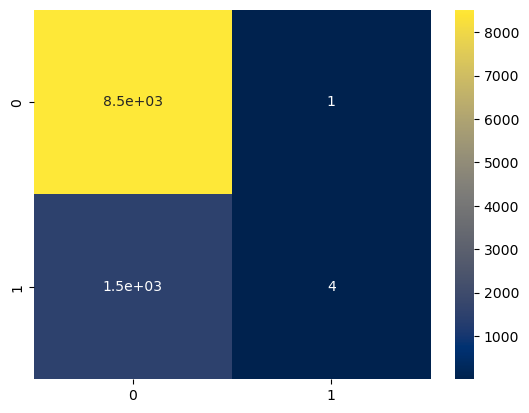

In [77]:
sns.heatmap(cm, annot=True, cmap='cividis')

In [80]:
with open('model/ada_british_airways_model.pkl', 'wb') as file:
    pkl.dump(ada_model, file)